### I would like to thank many experts for helping me with this kernel code.   

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets-mechanical-rotation/dataset_Mechanical_Rotation.csv


In [2]:
# for visualization 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patches as patches
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
# from scipy import interp => replace np.interp

# sklearn datasets 

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

# setting the text size of the graph

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)

# processing missing values

from sklearn.impute import SimpleImputer

# encoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

# cross validation.. etc

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from collections import Counter

# ML
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import mean_absolute_error

print("Setup Complete")

Setup Complete


below_original code (very thanks subinium) : https://www.kaggle.com/subinium/tps-may-categorical-eda

In [3]:
from cycler import cycler

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]

light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print("Setup Complete")

Setup Complete


In [5]:
data_dir = '../input/datasets-mechanical-rotation/dataset_Mechanical_Rotation.csv'
df = pd.read_csv(data_dir)

# original data (df) 
# for visualization : remove label NAN rows, Remove unnecessary columns and add index columns (df1)

df1 = df.drop(['cols6'], axis=1)
df1 = df1.replace('NAN', np.NaN)
df1 = df1.dropna(subset=['label'])

In [6]:
df1 = df1.reset_index()
df1 = df1.drop(['no.'], axis=1)

df1_label = df1['label'].copy()
df1 = df1.drop("label", axis=1)

df1.shape, df1_label.shape

((138, 21), (138,))

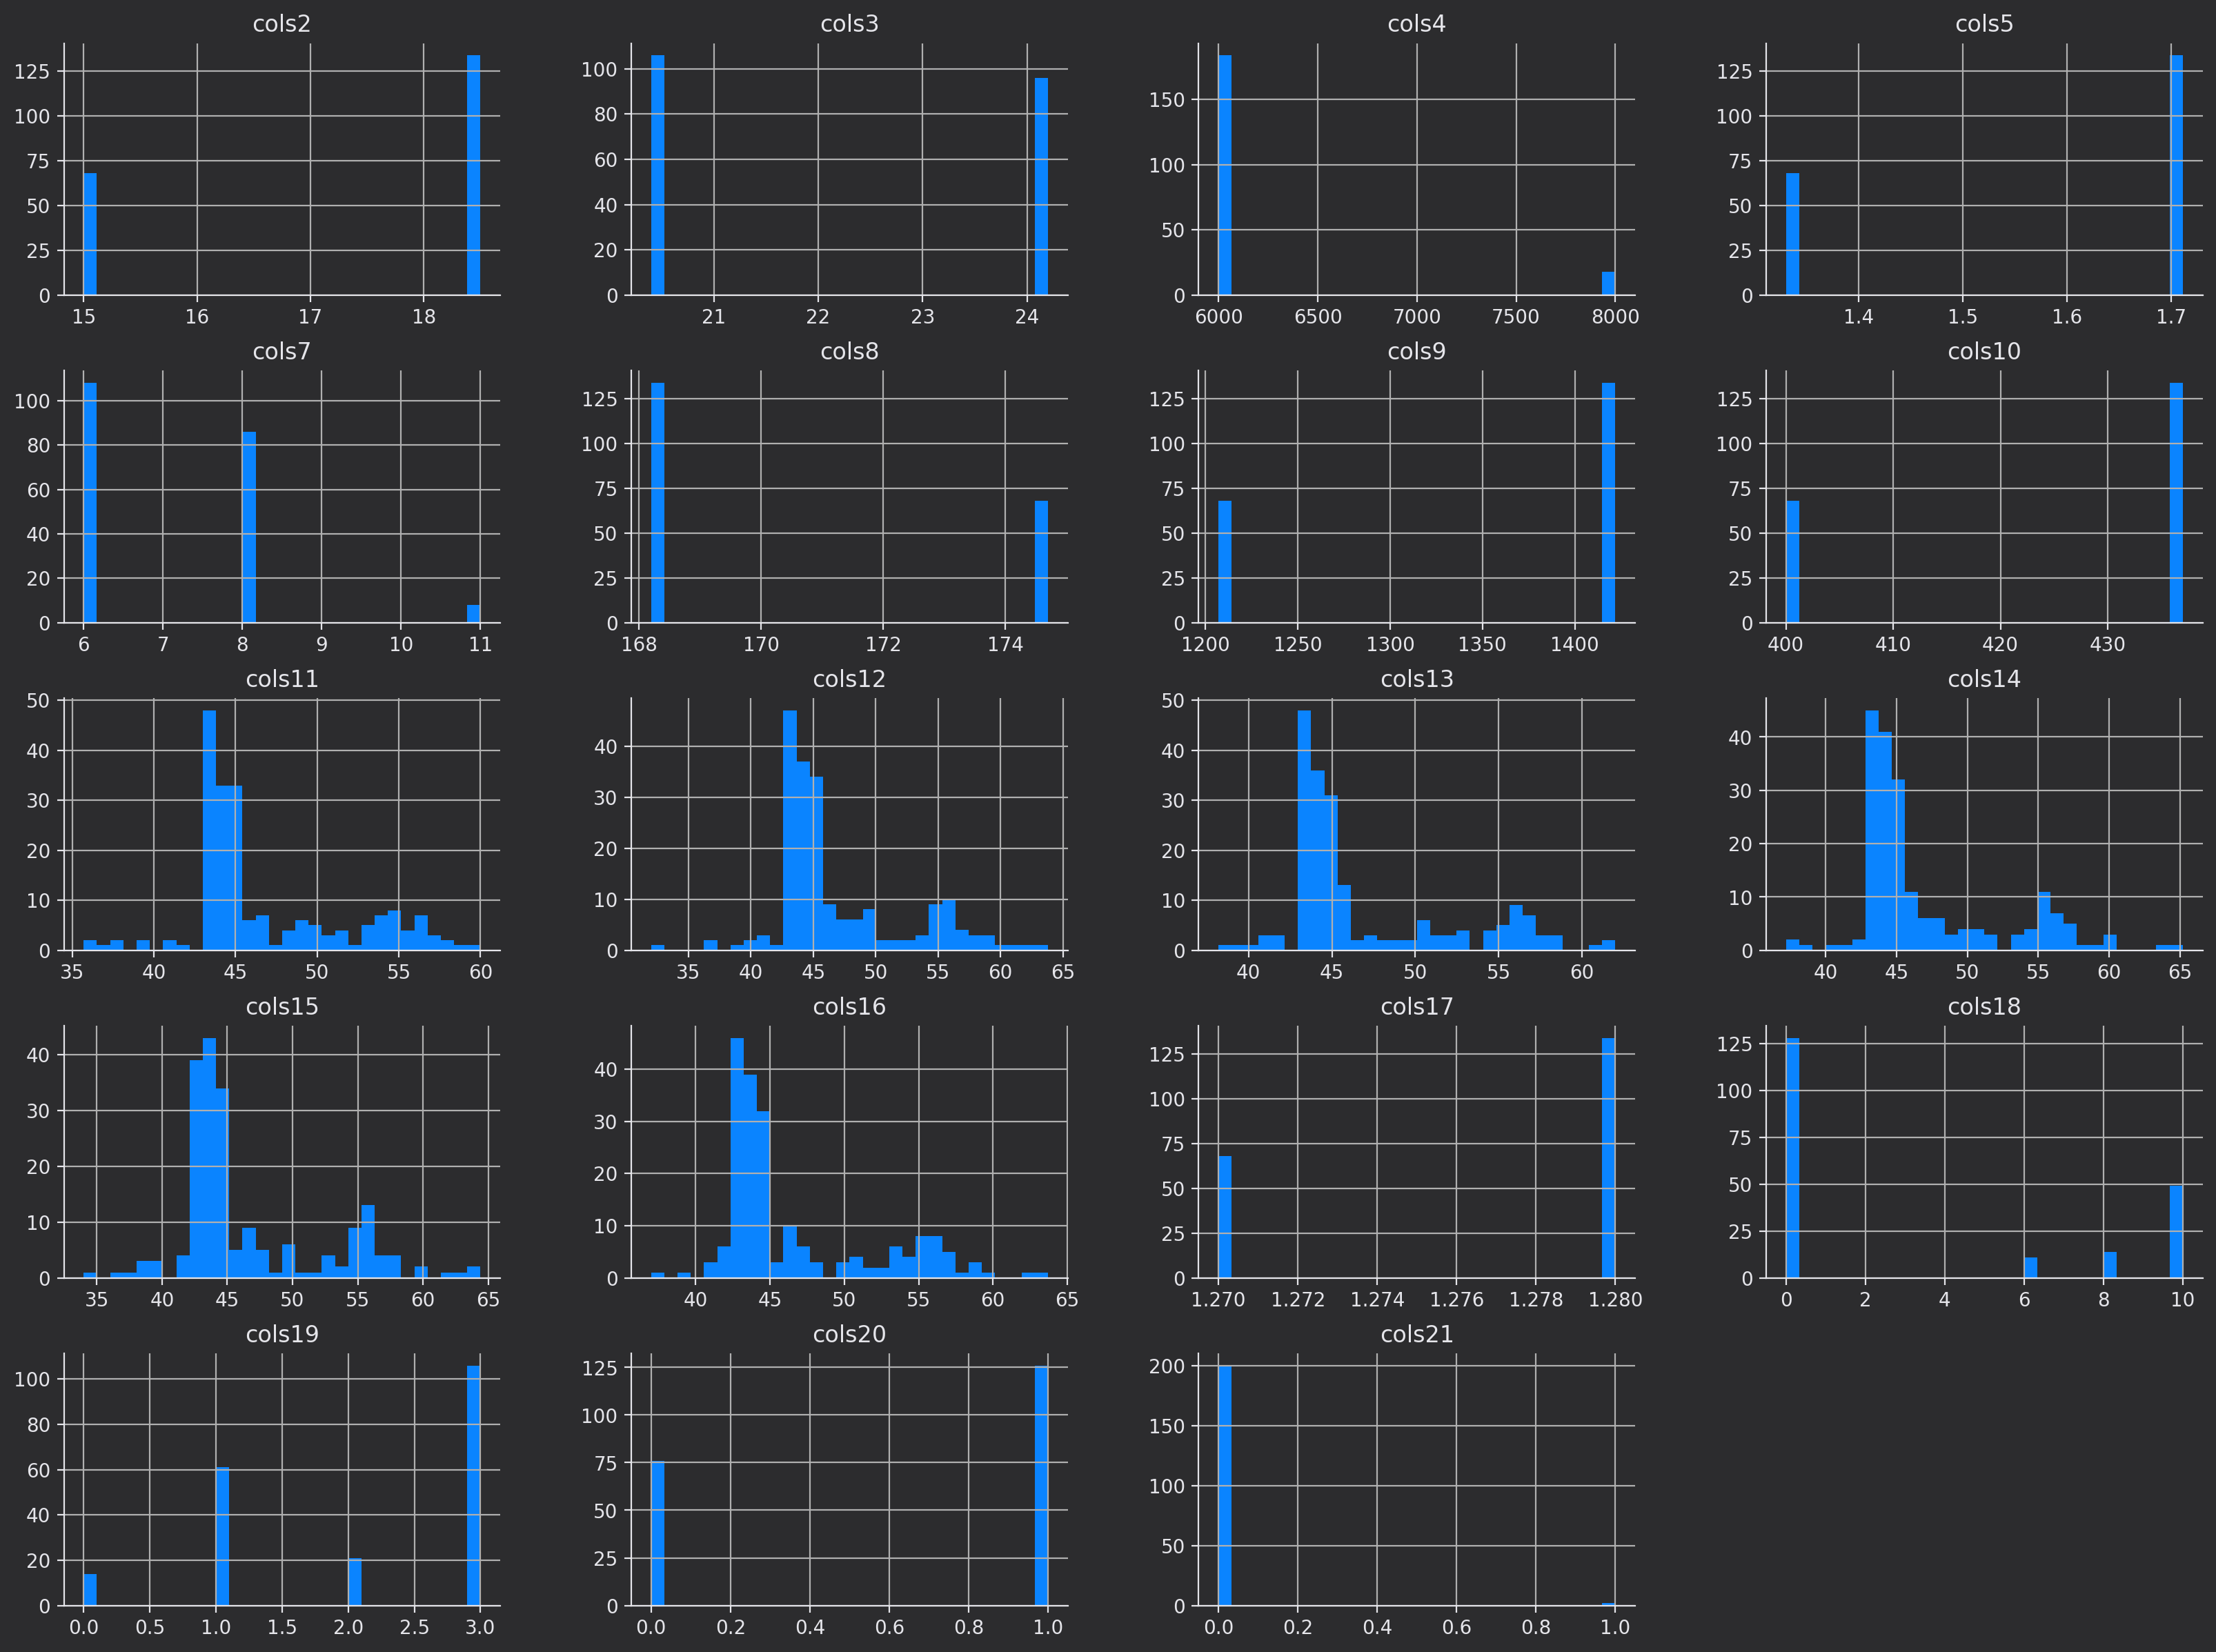

In [7]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

In [8]:
num_cols = ['cols2', 'cols3', 'cols4', 'cols5', 'cols7', 'cols8', 'cols9', 'cols10', 'cols11', 'cols12', 'cols13', 'cols14', 
            'cols15', 'cols16', 'cols17', 'cols18', 'cols19', 'cols20', 'cols21']
str_cols = ['cols1']

imputer = SimpleImputer(strategy="median")

df1_num = df1.drop(str_cols, axis=1)
imputer.fit(df1_num)

X = imputer.transform(df1_num)

df1_num = pd.DataFrame(X, columns=df1_num.columns, index = list(df1.index.values))
df1_num.isnull().sum()

index     0
cols2     0
cols3     0
cols4     0
cols5     0
cols7     0
cols8     0
cols9     0
cols10    0
cols11    0
cols12    0
cols13    0
cols14    0
cols15    0
cols16    0
cols17    0
cols18    0
cols19    0
cols20    0
cols21    0
dtype: int64

In [9]:
df1_num['cols22'] = (df1_num['cols11'] + df1_num['cols12'] + df1_num['cols13'] + df1_num['cols14'] + df1_num['cols15'] + df1_num['cols16']) / 6

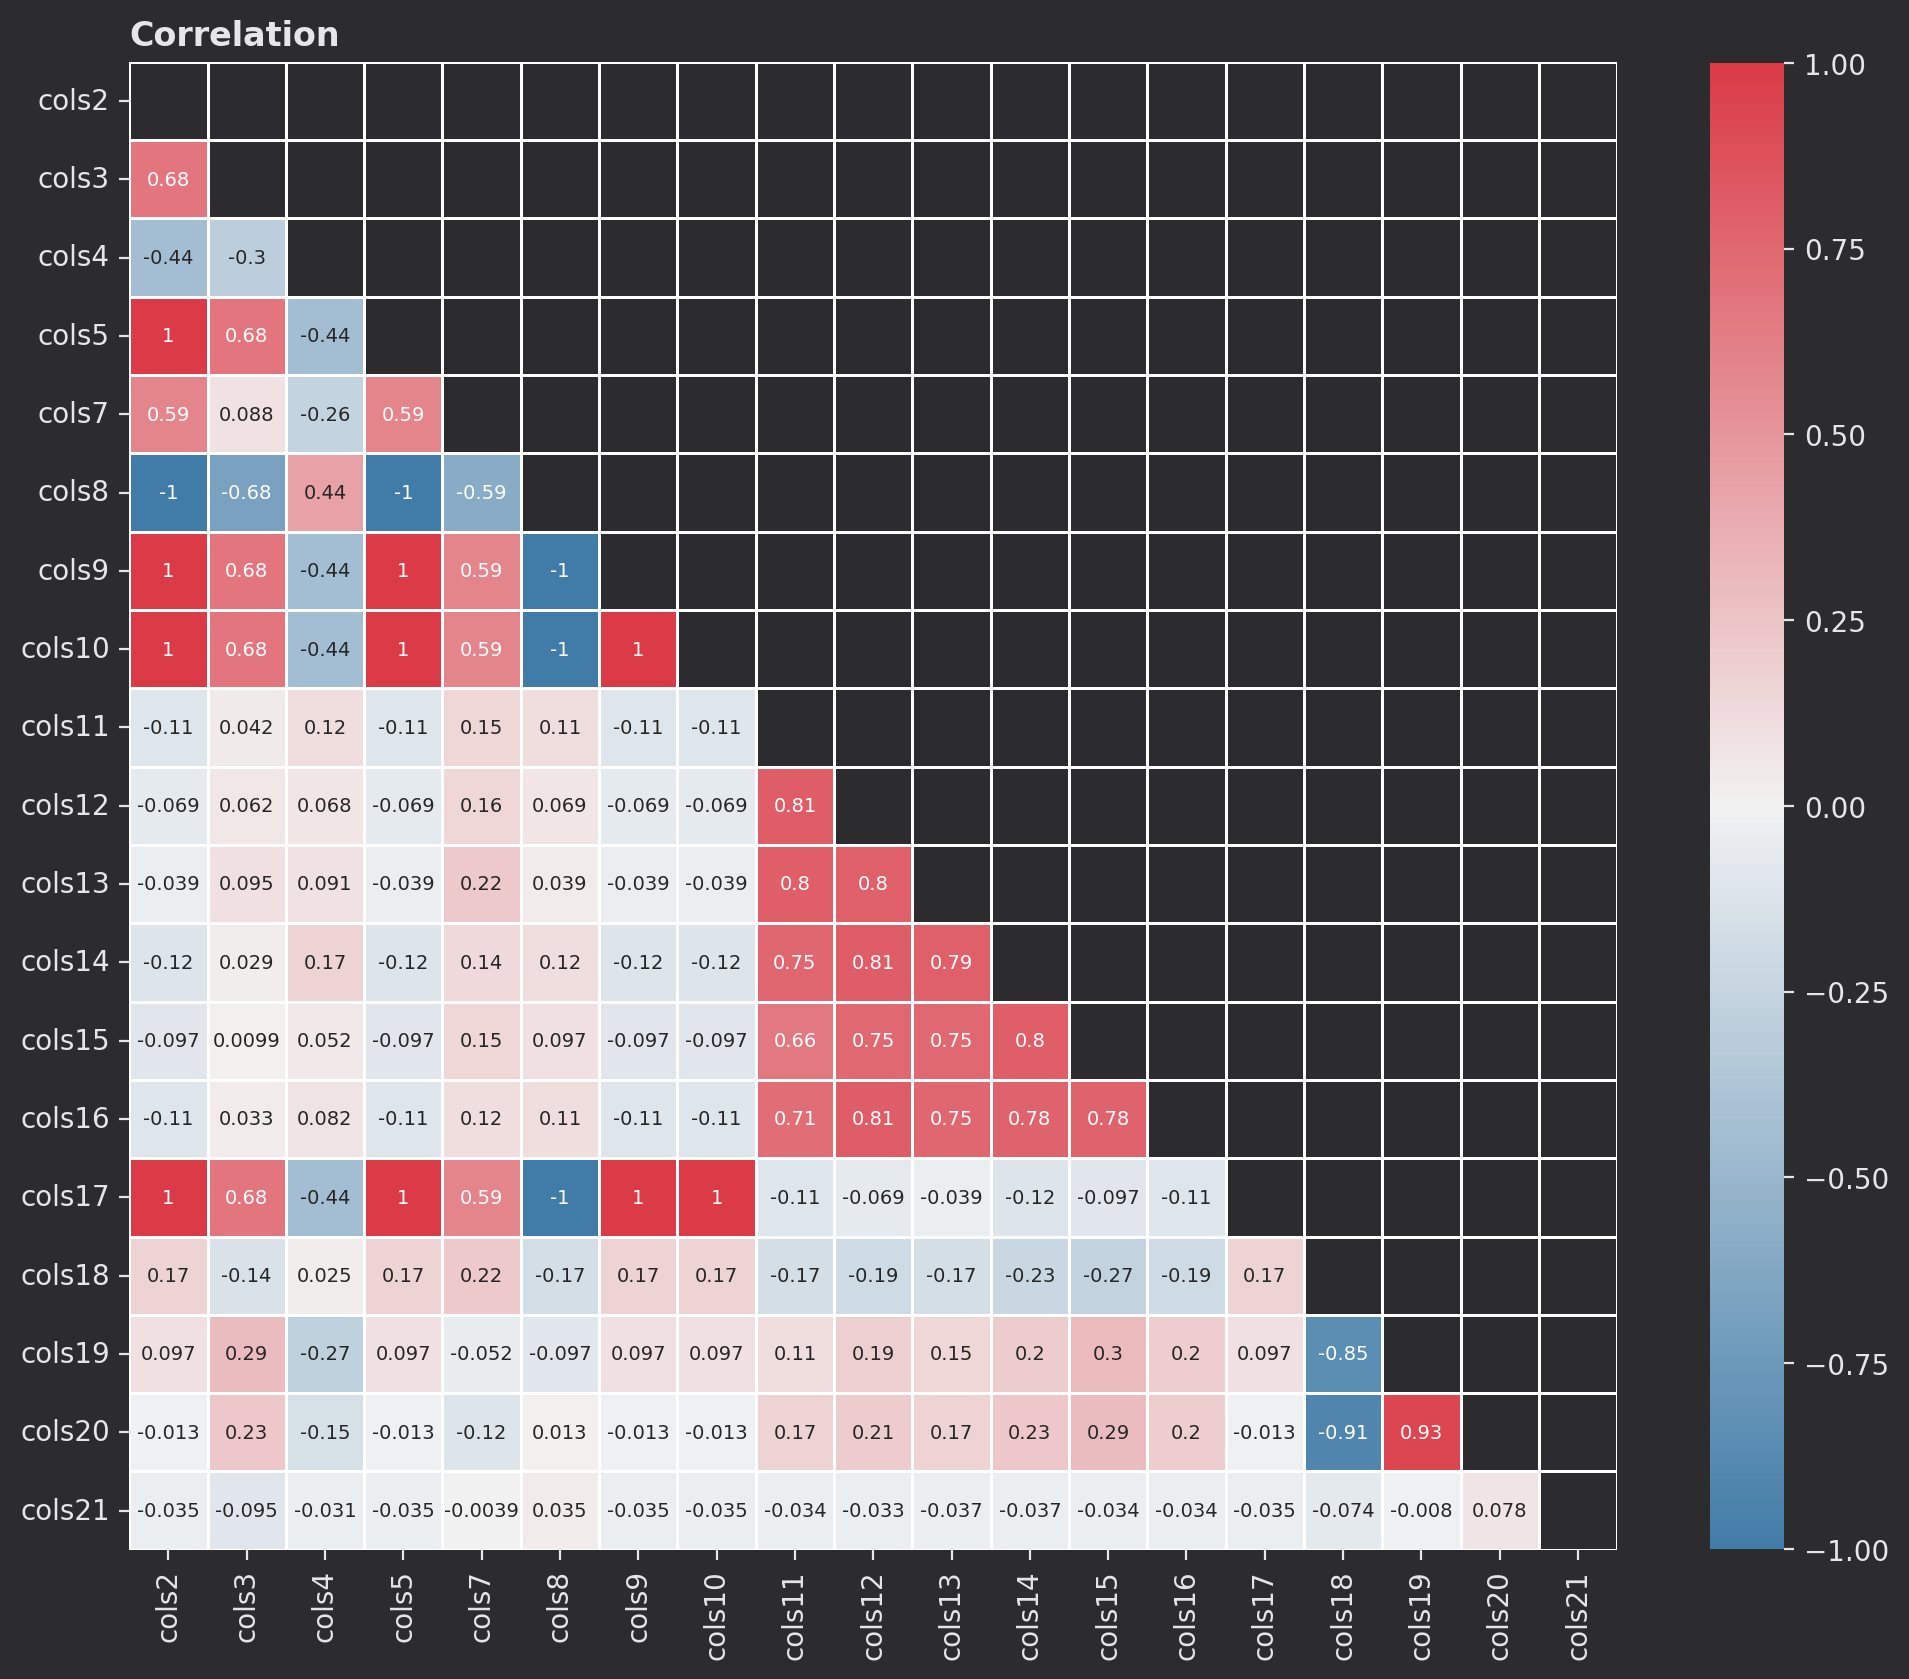

In [10]:
# Heatmap for the entire data

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df_corr = df.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, ax=ax,
           square=True, center=0, linewidth=1,
           cmap=sns.diverging_palette(240, 10, as_cmap=True),
           cbar_kws={'shrink': .82},
           mask=mask,
           annot=True,
           annot_kws={'size':7}
           )
ax.set_title(f'Correlation', loc='left', fontweight='bold')
plt.show()

In [11]:
# label - feature correlation 

df = pd.read_csv(data_dir)
df = df.drop(['cols6'], axis=1)
df = df.replace('NAN', np.NaN)
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)
df_matrix = df.corr()

df_matrix['label'].sort_values(ascending=False)

label     1.000000
cols21    0.177322
cols18    0.141929
cols7     0.130170
cols8     0.107195
cols11    0.036752
cols12   -0.040980
cols20   -0.042636
cols14   -0.047060
cols13   -0.053199
cols15   -0.064408
cols4    -0.083244
cols16   -0.093316
cols17   -0.107195
cols10   -0.107195
cols2    -0.107195
cols5    -0.107195
cols9    -0.107195
cols3    -0.152956
cols19   -0.318030
Name: label, dtype: float64

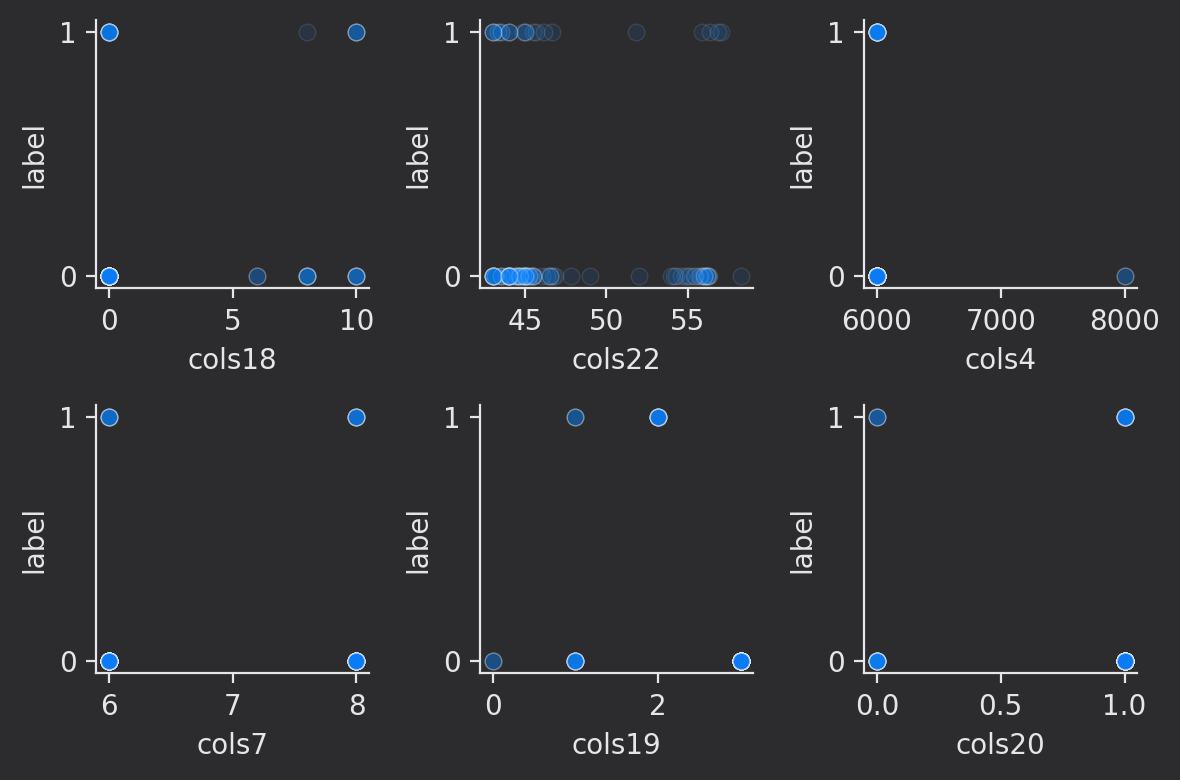

<Figure size 2800x1200 with 0 Axes>

In [12]:
# Create a plot with only meaningful features: Use the entire data because there is not much data (the features that clearly show label 1)

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3)
plt.figure(figsize=(14, 6))
plt.rc('font', size=10)

sns.scatterplot(data=df1_num, x='cols18', y=df1_label, alpha=0.1, ax=ax0)
sns.scatterplot(data=df1_num, x='cols22', y=df1_label, alpha=0.1, ax=ax1)
sns.scatterplot(data=df1_num, x='cols4', y=df1_label, alpha=0.1, ax=ax2)
sns.scatterplot(data=df1_num, x='cols7', y=df1_label, alpha=0.1, ax=ax3)
sns.scatterplot(data=df1_num, x='cols19', y=df1_label, alpha=0.1, ax=ax4)
sns.scatterplot(data=df1_num, x='cols20', y=df1_label, alpha=0.1, ax=ax5)

fig.tight_layout()
plt.show()

In [13]:
# The extract key features 

attributes = ['cols18', 'cols22', 'cols4', 'cols7', 'cols19', 'cols20'] # Domain Knowledge insight
# attributes2 = ['cols21', 'cols18', 'cols7', 'cols8', 'cols22', 'cols3', 'cols19'] # based on the correlation coefficient 

# scatter_matrix(df1_num[attributes], figsize=(12, 8))

In [14]:
df1_num = df1_num[attributes]
df1_num.shape, df1_label.shape

((138, 6), (138,))

In [15]:
df1_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cols18  138 non-null    float64
 1   cols22  138 non-null    float64
 2   cols4   138 non-null    float64
 3   cols7   138 non-null    float64
 4   cols19  138 non-null    float64
 5   cols20  138 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


In [16]:
ohe = OneHotEncoder()
ohe.fit(df1_num)
df1_num_ohe = ohe.transform(df1_num)
df1_num_ohe

<138x72 sparse matrix of type '<class 'numpy.float64'>'
	with 828 stored elements in Compressed Sparse Row format>

In [17]:
# Dimension reduction Visualization 

tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(df1_num_ohe)

tsne_df = pd.DataFrame(np.column_stack((transformed_data, df1_label)),
                      columns=['X', 'y', 'label']
                      )
tsne_df.loc[:, 'label'] = tsne_df['label'].astype(int)

In [18]:
tsne_df.head()

,X,y,label
0,-4.213915,2.313835,1
1,3.907135,-0.26673,0
2,2.748403,2.511772,0
3,1.753815,0.695014,0
4,-1.539908,-6.312921,0


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


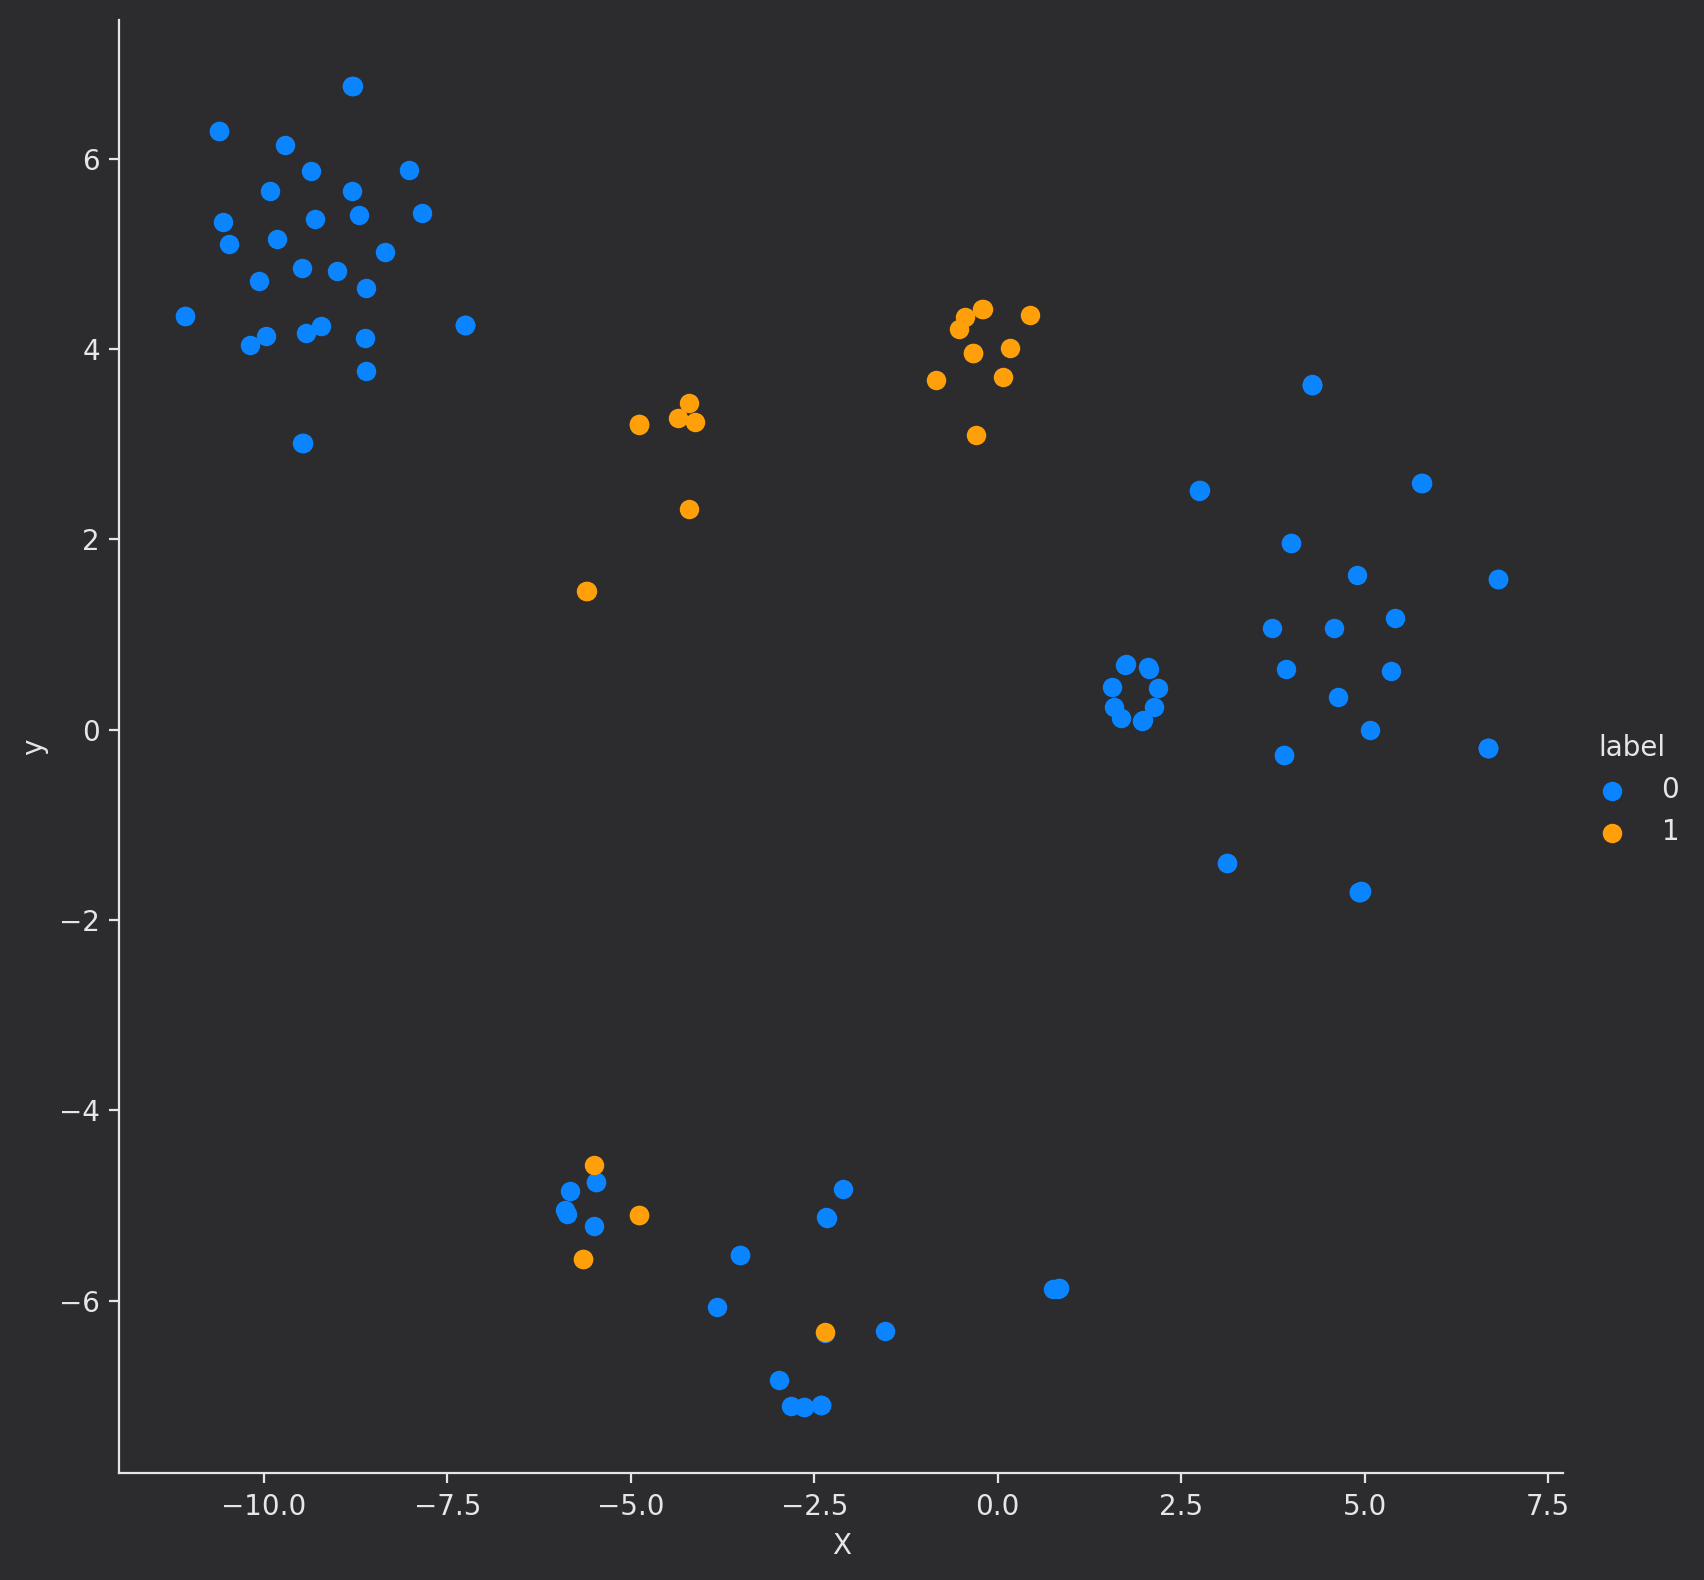

In [19]:
# Cluster Visualization 

grid = sns.FacetGrid(tsne_df, hue='label', size=8)
grid.map(plt.scatter, "X", 'y').add_legend()

## ML modeling

In [20]:
df1_num.shape, df1_label.shape

((138, 6), (138,))

In [21]:
df1_num.head()

,cols18,cols22,cols4,cols7,cols19,cols20
0,0.0,43.333333,6000.0,8.0,2.0,0.0
1,0.0,43.833333,6000.0,6.0,3.0,1.0
2,0.0,43.500000,6000.0,6.0,3.0,1.0
3,0.0,44.000000,6000.0,6.0,3.0,1.0
4,8.0,43.000000,6000.0,6.0,0.0,0.0


In [22]:
category_cols = ['cols18', 'cols19', 'cols20']
num_cols = ['cols22', 'cols4', 'cols7']

df1_cate = df1_num[category_cols]

In [23]:
df1_num = pd.concat([df1_cate, df1_num[num_cols], df1_label], axis=1)

scaler = StandardScaler()
features = [
        f for f in df1_num.columns if f not in ('label')
    ]
df1_num[features] = scaler.fit_transform(df1_num[features])

In [24]:
df1_num.shape

(138, 7)

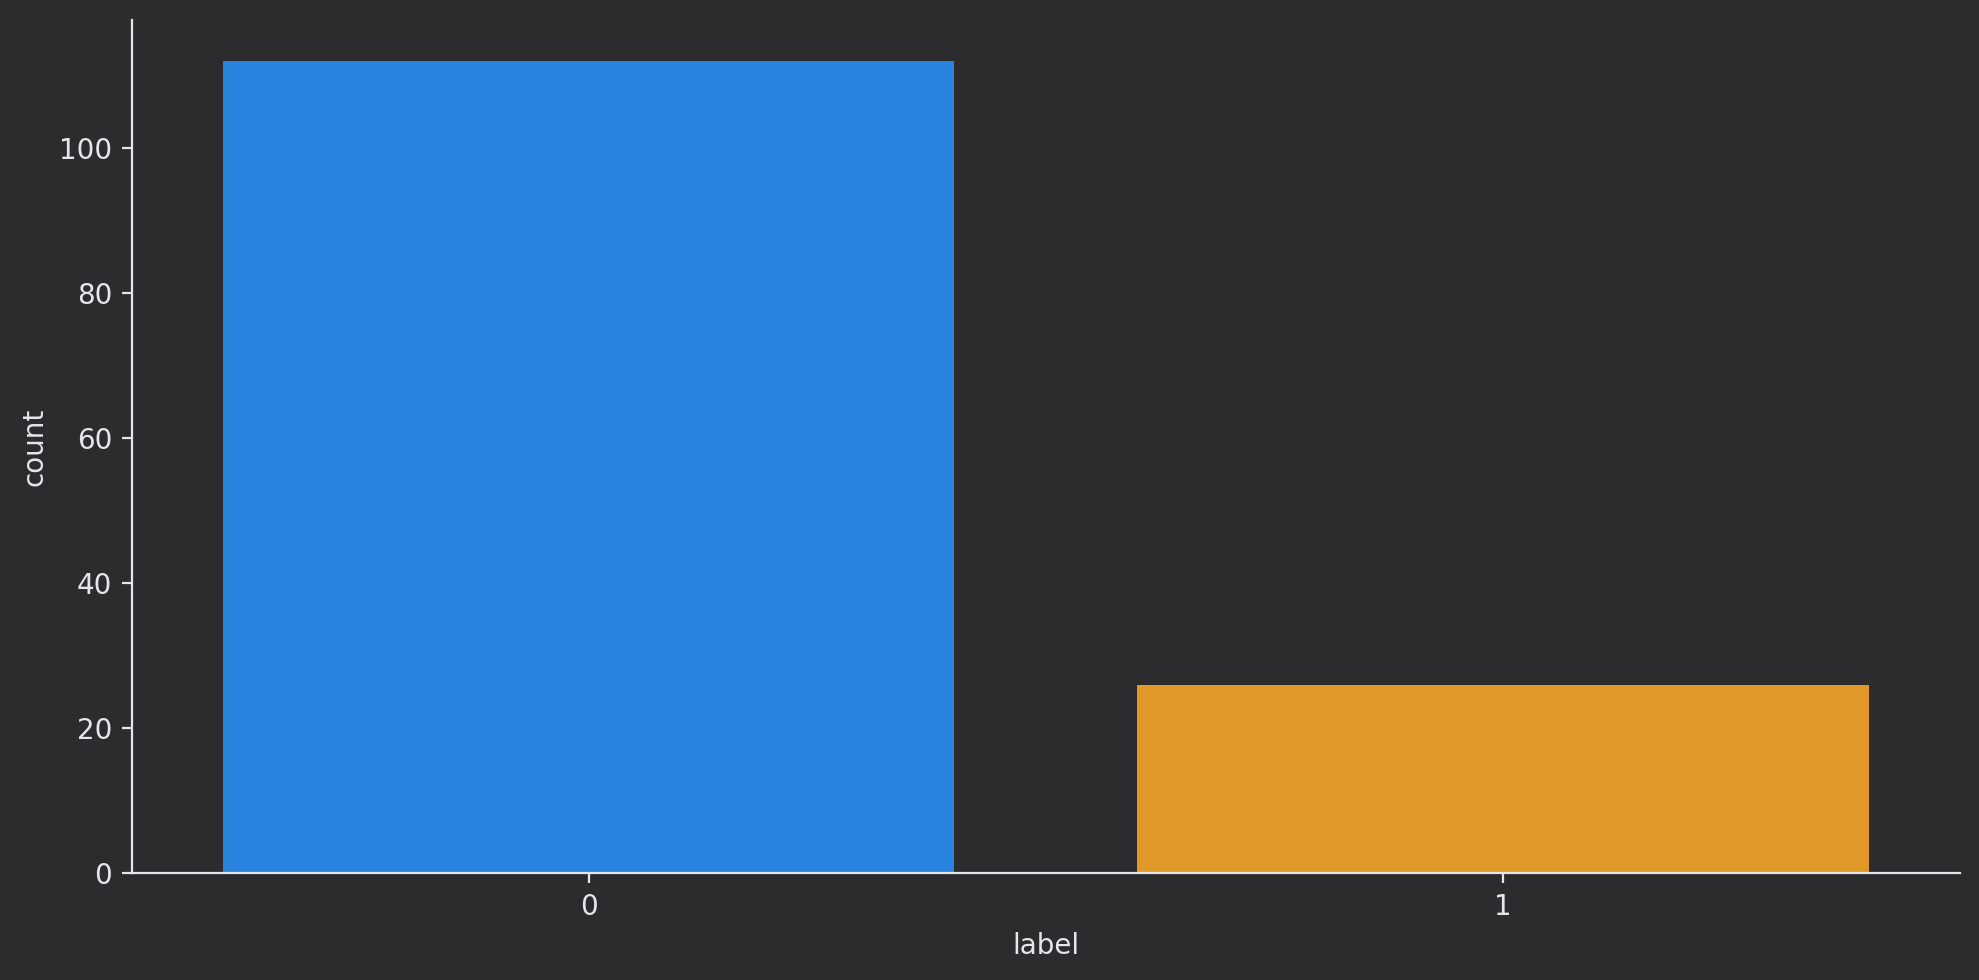

In [25]:
# Label Check 

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='label')
fig.tight_layout()
plt.show()

In [26]:
# Ensemble 
from functools import partial
from scipy import optimize

class OptimizeAUC:
    def __init__(self):
        self.coef_ = 0
        
    def _auc(self, coef, X, y):
        '''
        :param coef : weight list 
        '''
        x_coef = X * coef
        predictions = np.sum(x_coef, axis=1)
        auc_score = metrics.roc_auc_score(y, predictions)
        
        return -1.0 * auc_score
    
    def fit(self, X, y):
        loss_partial = partial(self._auc, X=X, y=y)
        
        # any distribution where the sum of weights is 1 
        initial_coef = np.random.dirichlet(np.ones(X.shape[1]), 
                                                  size=1)
        self.coef_ = optimize.fmin(loss_partial, initial_coef, disp=True)
    
    def predict(self, X):
        x_coef = X * self.coef_
        predictions = np.sum(x_coef, axis=1)
        
        return predictions

In [27]:
X = df1_num.iloc[:, :-1].values
y = df1_num.iloc[:, -1].values

xfold1, xfold2, yfold1, yfold2 = model_selection.train_test_split(
    X,
    y,
    test_size=0.5,
    stratify=y,
    shuffle=True,
    random_state=42
)

knn = KNeighborsClassifier(n_jobs=-1)
rf = ensemble.RandomForestClassifier(random_state=42)
xgbc = xgb.XGBClassifier(random_state=42, 
                         n_jobs=-1,
                         use_label_encoder=True,
                         eval_metric='error'
                        )
tree = DecisionTreeClassifier(random_state=42)

knn.fit(xfold1, yfold1)
rf.fit(xfold1, yfold1)
xgbc.fit(xfold1, yfold1)
tree.fit(xfold1, yfold1)

pred_knn = knn.predict_proba(xfold2)[:, 1]
pred_rf = rf.predict_proba(xfold2)[:, 1]
pred_xgbc = xgbc.predict_proba(xfold2)[:, 1]
pred_tree = tree.predict_proba(xfold2)[:, 1]
avg_pred = (pred_knn + pred_rf + pred_xgbc + pred_tree) / 4

fold2_preds = np.column_stack((
    pred_knn,
    pred_rf,
    pred_xgbc,
    pred_tree,
    avg_pred
))

aucs_fold2 = []

for i in range(fold2_preds.shape[1]):
    auc = metrics.roc_auc_score(yfold2, fold2_preds[:, i])
    aucs_fold2.append(auc)

print(f"Fold-2: KNN AUC = {aucs_fold2[0]}")
print(f"Fold-2: RF AUC = {aucs_fold2[1]}")
print(f"Fold-2: XGB AUC = {aucs_fold2[2]}")
print(f"Fold-2: TREE AUC = {aucs_fold2[3]}")
print(f"Fold-2: Average Pred AUC = {aucs_fold2[4]}")

# fold change 

knn = KNeighborsClassifier(n_jobs=-1)
rf = ensemble.RandomForestClassifier(random_state=42)
xgbc = xgb.XGBClassifier(random_state=42, 
                         n_jobs=-1,
                         use_label_encoder=True,
                         eval_metric='error'
                        )
tree = DecisionTreeClassifier(random_state=42)

knn.fit(xfold2, yfold2)
rf.fit(xfold2, yfold2)
xgbc.fit(xfold2, yfold2)
tree.fit(xfold2, yfold2)

pred_knn = knn.predict_proba(xfold1)[:, 1]
pred_rf = rf.predict_proba(xfold1)[:, 1]
pred_xgbc = xgbc.predict_proba(xfold1)[:, 1]
pred_tree = tree.predict_proba(xfold1)[:, 1]
avg_pred = (pred_knn + pred_rf + pred_xgbc + pred_tree) / 4

fold1_preds = np.column_stack((
    pred_knn,
    pred_rf,
    pred_xgbc,
    pred_tree,
    avg_pred
))

aucs_fold1 = []

for i in range(fold1_preds.shape[1]):
    auc = metrics.roc_auc_score(yfold1, fold1_preds[:, i])
    aucs_fold1.append(auc)

print(f"Fold-1: KNN AUC = {aucs_fold1[0]}")
print(f"Fold-1: RF AUC = {aucs_fold1[1]}")
print(f"Fold-1: XGB AUC = {aucs_fold1[2]}")
print(f"Fold-1: TREE AUC = {aucs_fold1[3]}")
print(f"Fold-1: Average Pred AUC = {aucs_fold1[4]}")

opt = OptimizeAUC()
opt.fit(fold1_preds[:, :-1], yfold1)
opt_preds_fold2 = opt.predict(fold2_preds[:, :-1])
auc = metrics.roc_auc_score(yfold2, opt_preds_fold2)

print(f"Optimized AUC, Fold 2 = {auc}")
print(f"Coefficients = {opt.coef_}")

opt = OptimizeAUC()
opt.fit(fold2_preds[:, :-1], yfold2)
opt_preds_fold1 = opt.predict(fold1_preds[:, :-1])
auc = metrics.roc_auc_score(yfold1, opt_preds_fold1)

print(f"Optimized AUC, Fold 1 = {auc}")
print(f"Coefficients = {opt.coef_}")

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold-2: KNN AUC = 0.9574175824175825
Fold-2: RF AUC = 0.9869505494505494
Fold-2: XGB AUC = 1.0
Fold-2: TREE AUC = 0.9375
Fold-2: Average Pred AUC = 0.9986263736263736


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold-1: KNN AUC = 0.9464285714285714
Fold-1: RF AUC = 0.9402472527472527
Fold-1: XGB AUC = 0.9821428571428572
Fold-1: TREE AUC = 0.8846153846153846
Fold-1: Average Pred AUC = 0.9629120879120879
Optimization terminated successfully.
         Current function value: -0.958791
         Iterations: 9
         Function evaluations: 53
Optimized AUC, Fold 2 = 0.9903846153846153
Coefficients = [0.46085994 0.35863393 0.08500018 0.09550594]
Optimization terminated successfully.
         Current function value: -0.995879
         Iterations: 10
         Function evaluations: 55
Optimized AUC, Fold 1 = 0.9587912087912088
Coefficients = [0.17463932 0.28568717 0.12697758 0.41269593]


In [28]:
# Hyperparameter Tuning 

import skopt
from skopt import gp_minimize
from skopt import space
from skopt.space import Real, Categorical, Integer
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

# print('skopt %s' % skopt.__version__)

def optimize(params, x, y):
    '''
    :param params: the value obtained from hyperopt
    :param x : training data
    :param y : target 
    :return : minus auc of 5 - cross-validation of fold
    '''
#     params = dict(zip(param_names, params)) # dict transform 
    model = xgb.XGBClassifier(
        random_state=42, n_jobs=-1,
        use_label_encoder=False, eval_metric='error',
        **params
    )
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    aucs = []
    
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
    
        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
    
        fold_auc = metrics.roc_auc_score(
            ytest,
            preds
        )
        aucs.append(fold_auc)

    return -1 * np.mean(aucs)

if __name__ == "__main__":
    df = df1_num
    
    X = df.drop('label', axis=1).values
    y = (df.label.values).astype(int)
    
    param_space = {
        "max_depth": scope.int(hp.quniform('max_depth', 3, 25, 2)),
        "reg_alpha": hp.uniform('reg_alpha', 0.01, .4),
        "learning_rate": hp.uniform('learning_rate', 0.01, 0.2),
        "colsample_bytree": hp.uniform('colsample_bytree', 0.5, 1.0),
        "gamma": hp.uniform('gamma', 0.05, 1.0),
#         "num_leaves": hp.choice('num_leaves', list(range(20, 250, 10))),
#         "min_child_samples": hp.choice('min_child_samples', list(range(100, 250, 10))),
#         "subsample": hp.choice('subsample', [0.2, 0.5, 0.6, 0.7, 0.8, 0.9])
#         "feature_fraction": hp.uniform('feature_fraction', 0.4, .8),
#         "bagging_fraction": hp.uniform('bagging_fraction', 0.4, .9)
    }
        
    optimization_function = partial(
        optimize,
        x=X,
        y=y
    )
    
    trials = Trials()
    
    best = fmin(
        fn=optimization_function,
        space=param_space,
        algo=tpe.suggest,
        max_evals=15,
        trials=trials
    )
  
    print("Best: {}".format(best))

100%|██████████| 15/15 [00:32<00:00,  2.14s/trial, best loss: -0.8921212121212122]
Best: {'colsample_bytree': 0.7968366421481936, 'gamma': 0.28266154716679576, 'learning_rate': 0.06599374632837525, 'max_depth': 20.0, 'reg_alpha': 0.3522153057251552}


In [29]:
# from skopt.plots import plot_convergence
# plot_convergence(result)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=0, precision=0.9285714285714286


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=1, precision=0.9642857142857143


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=2, precision=0.9285714285714286


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=3, precision=1.0


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=4, precision=1.0


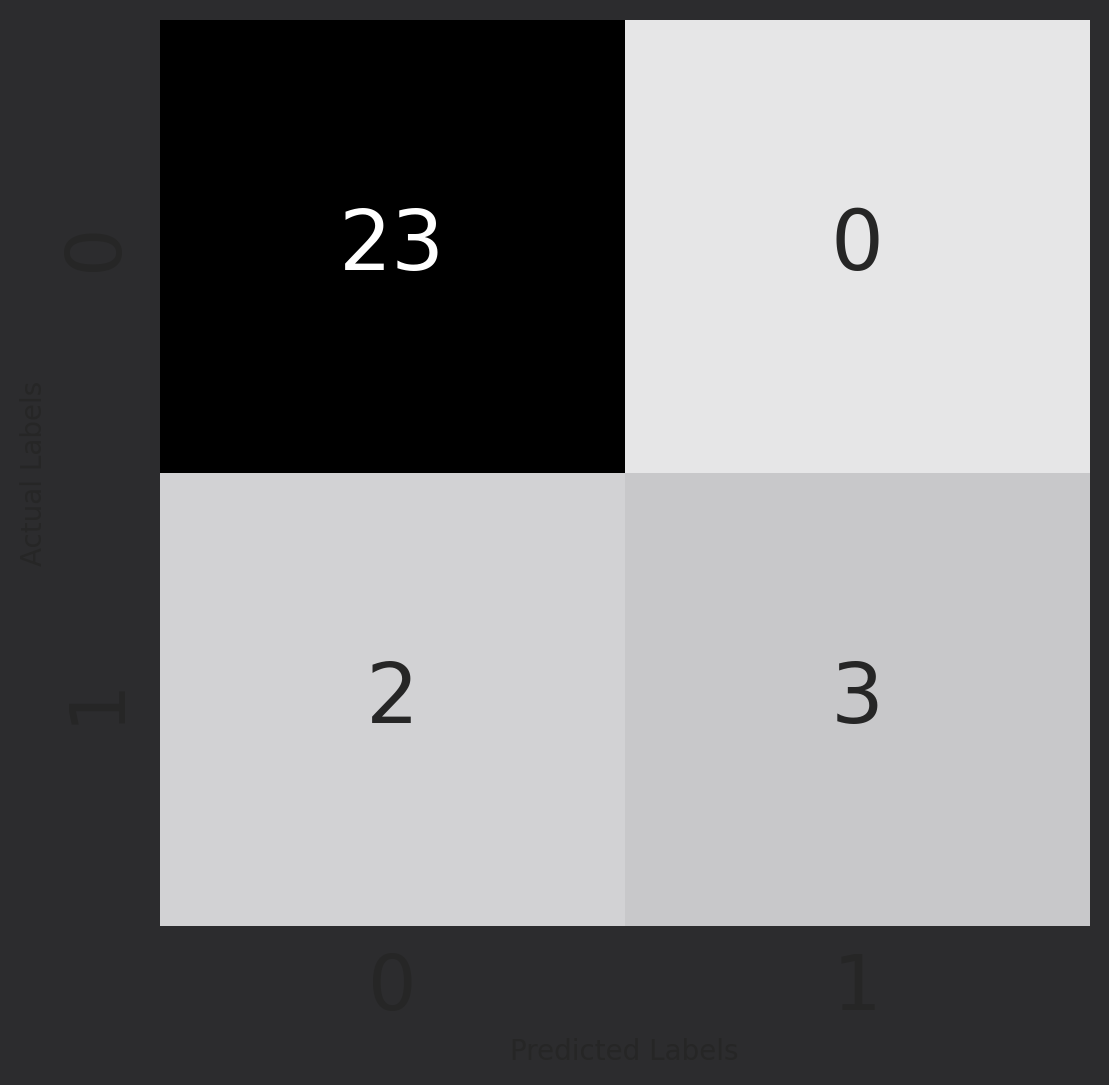

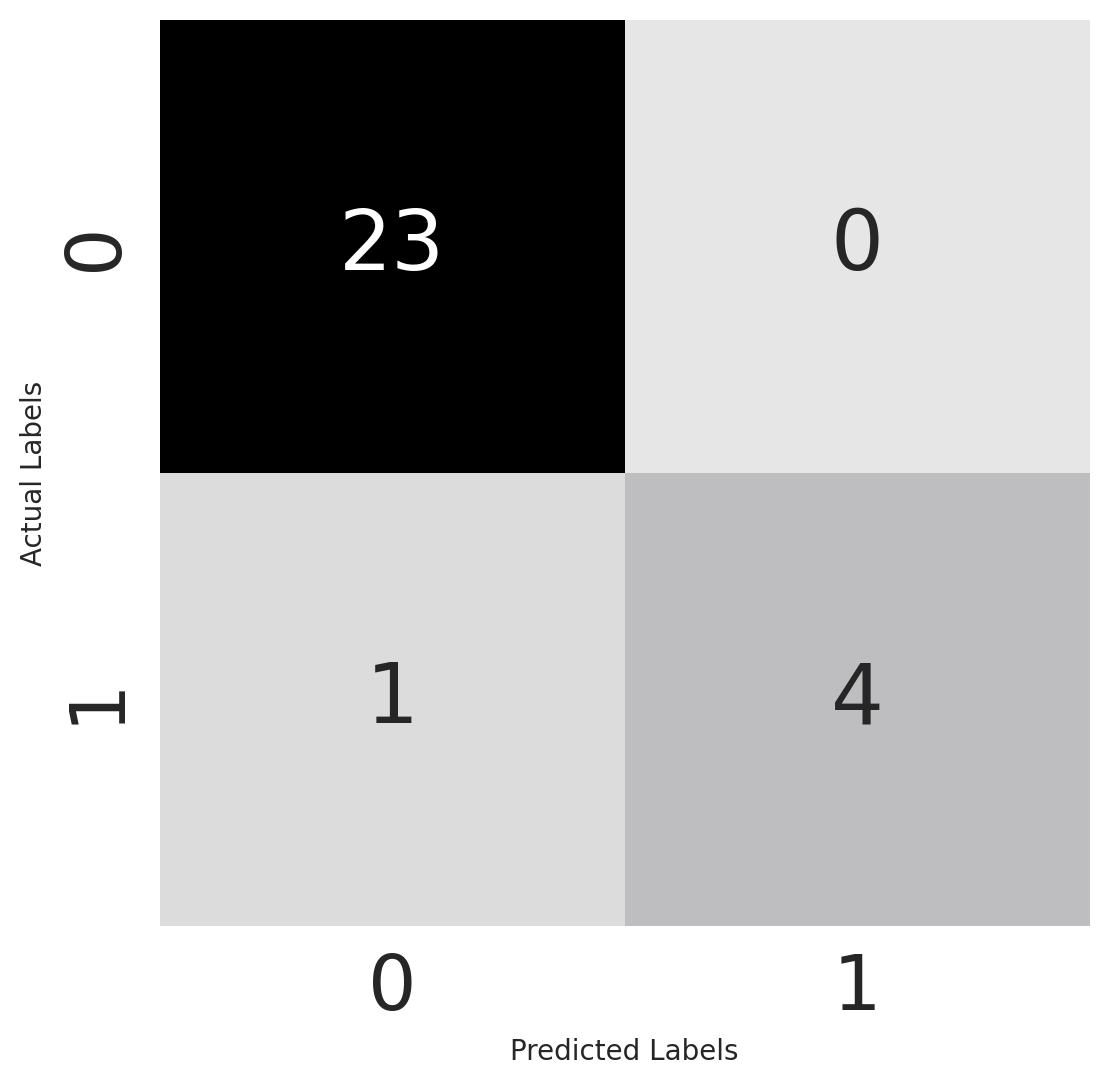

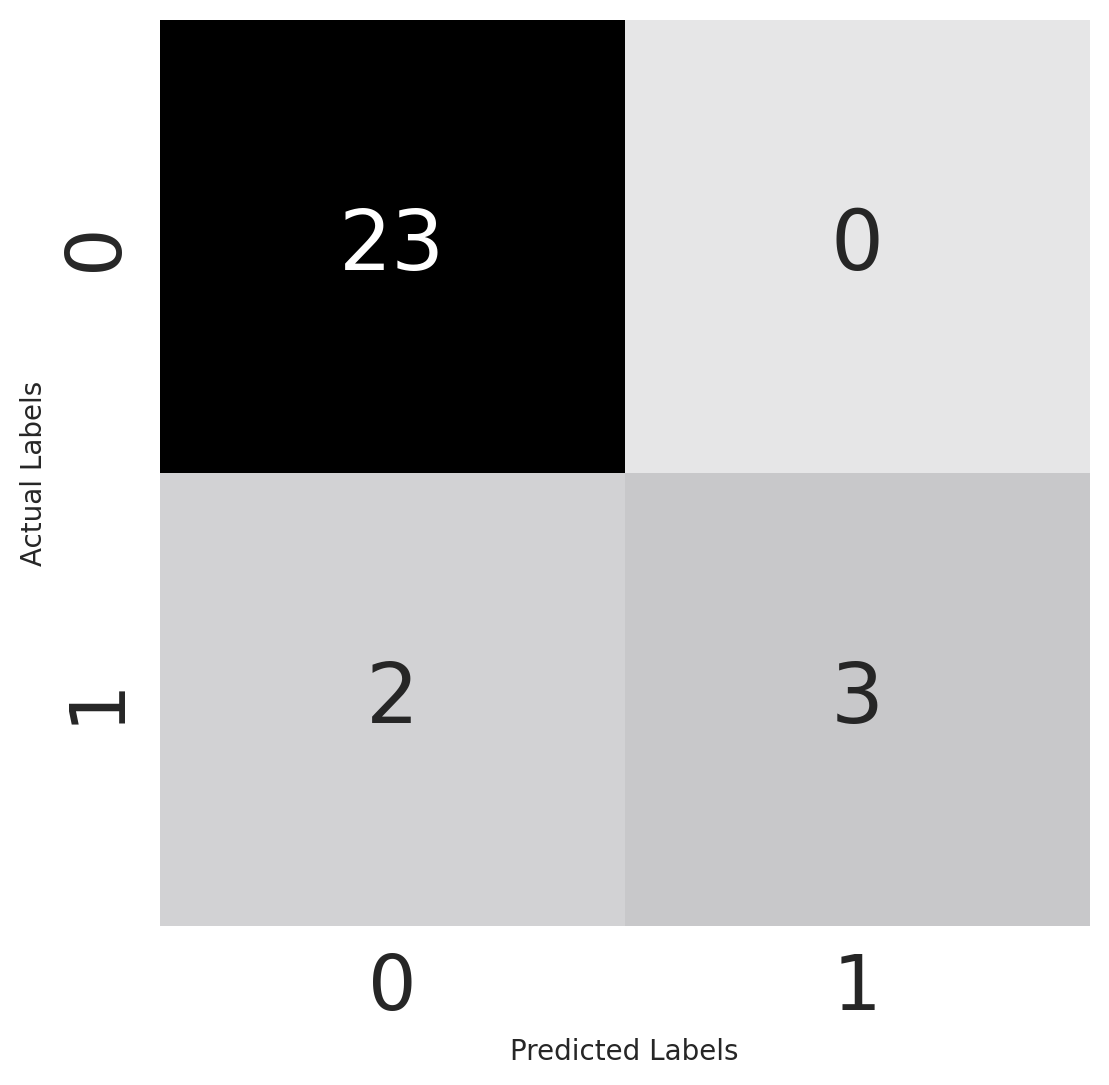

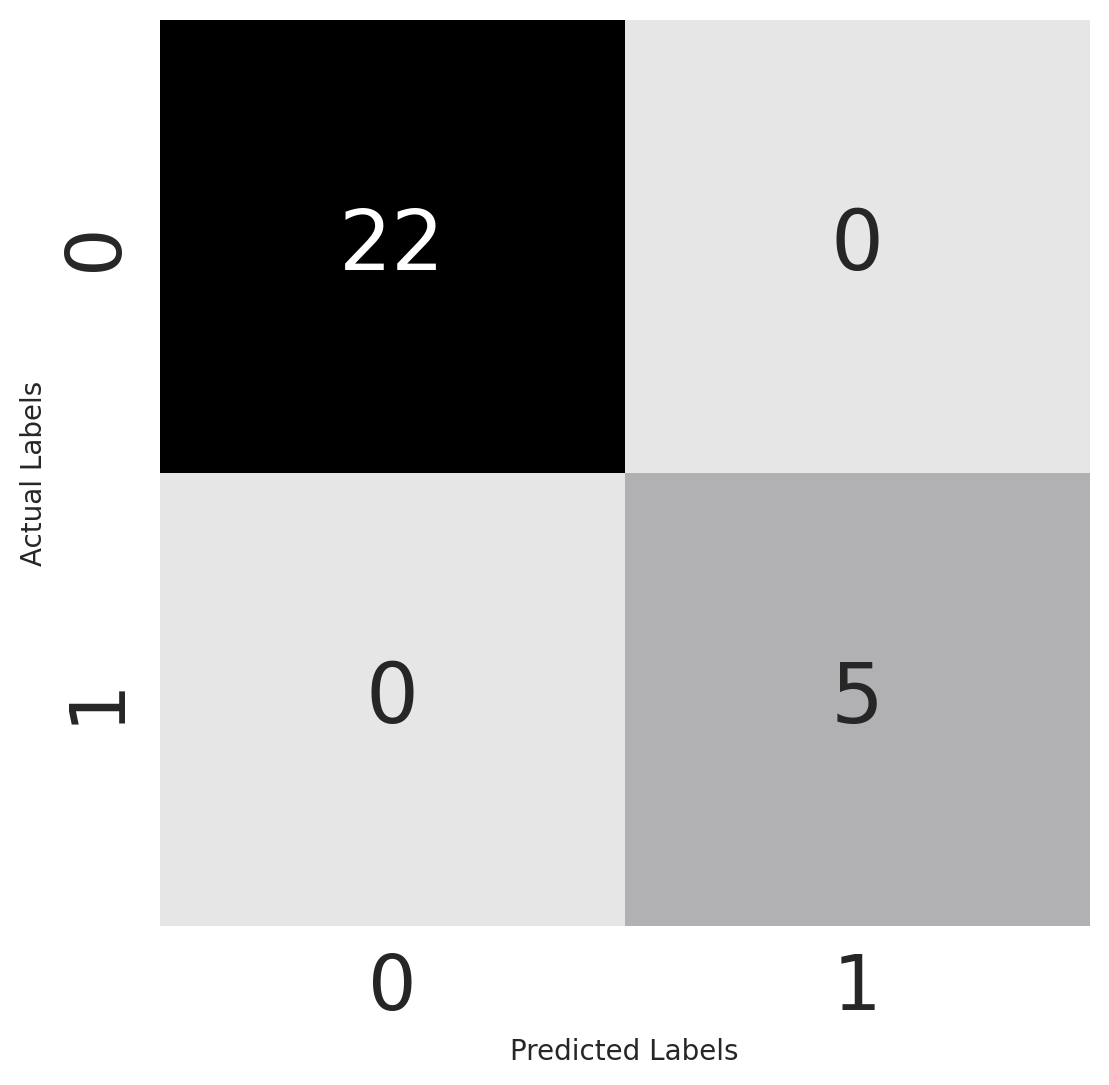

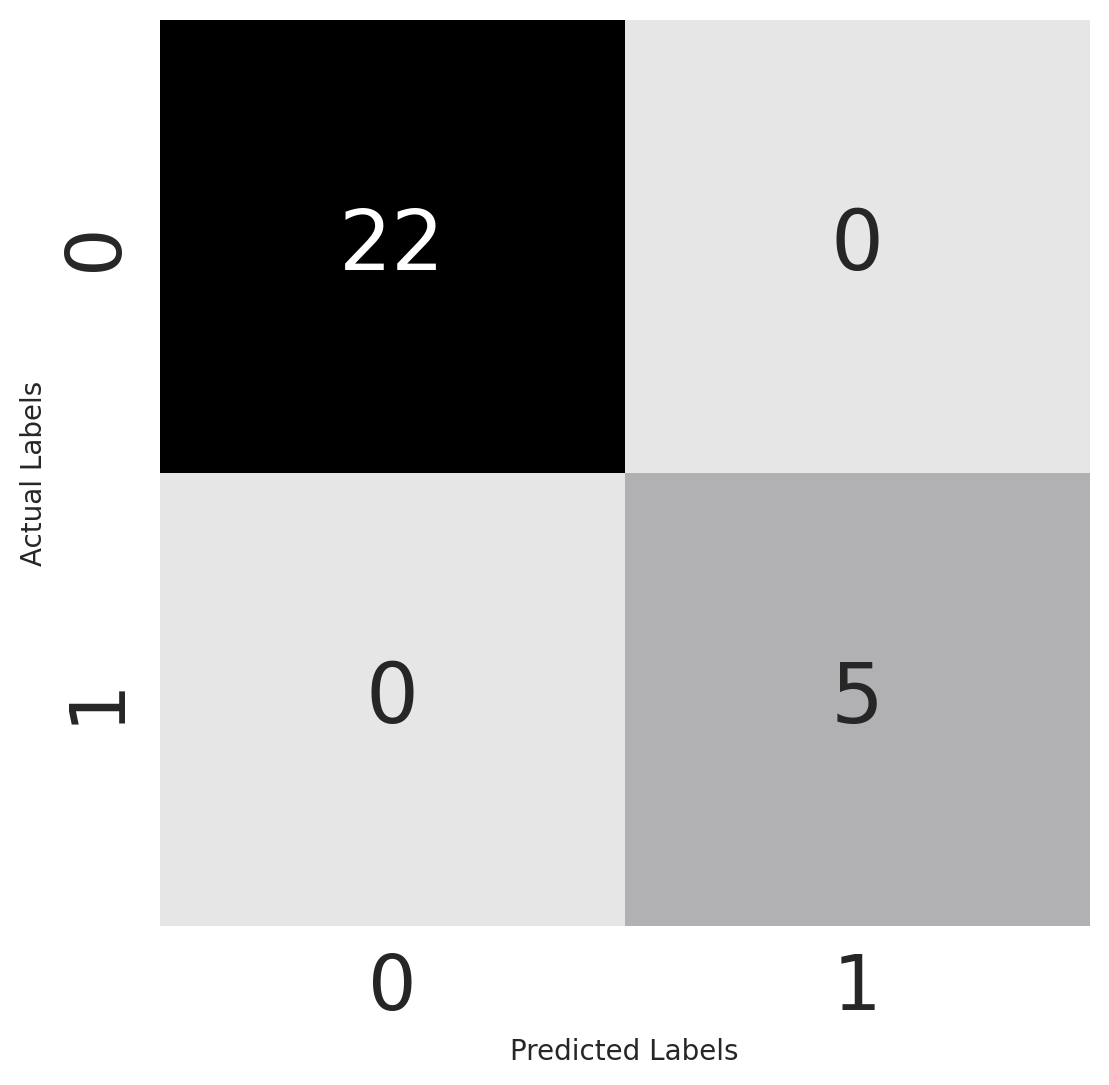

In [30]:
# Numerical features cross-validation model (precision)

def run(df, y_cols, fold):  
    df_temp = df
    
    df['kfold'] = -1
    df = df.sample(frac=1).reset_index(drop=True)
    
    features = [
        f for f in df.columns if f not in ('label', 'kfold')
    ]
        
    X = df.iloc[:, :-1]
    y = df[y_cols].values
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for f, (t_, v_) in enumerate(kf.split(X=X, y=y)):
        df.loc[v_, 'kfold'] = f
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
        
    ohe = OneHotEncoder()
    full_data = pd.concat([df_train[features], df_valid[features]], axis=0)
    ohe.fit(full_data[features])
    
    x_train = ohe.transform(df_train[features])
    y_train = df_train[y_cols].values
    
    x_valid = ohe.transform(df_valid[features])
    y_valid = df_valid[y_cols].values
   
    model = xgb.XGBClassifier(random_state=42, 
                              n_jobs=-1,
                              use_label_encoder=True,
                              eval_metric='error',
                              colsample_bytree=0.5927,
                              gamma=0.40696,
                              learning_rate=0.1474,
                              max_depth=12,
                              reg_alpha=0.3320
                             )

    model.fit(x_train, y_train)
    
    preds = model.predict(x_valid)
    prec = metrics.precision_score(y_valid, preds, average='micro')
    print(f"Fold={fold}, precision={prec}")
    
    cm = metrics.confusion_matrix(y_valid, preds)
    plt.figure(figsize=(6, 6))
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    sns.set(font_scale=2.5)
    sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
    plt.ylabel("Actual Labels", fontsize=10)
    plt.xlabel("Predicted Labels", fontsize=10)
    
if __name__ == "__main__":
    for fold_ in range(5):
        run(df1_num, 'label', fold=fold_)

In [31]:
# Numerical features cross-validation model (AUC)

def run(df, y_cols, fold):  
    df_temp = df
    
    df['kfold'] = -1
    df = df.sample(frac=1).reset_index(drop=True)
    
    features = [
        f for f in df.columns if f not in ('label', 'kfold')
    ]
        
    X = df.iloc[:, :-1]
    y = df[y_cols].values
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for f, (t_, v_) in enumerate(kf.split(X=X, y=y)):
        df.loc[v_, 'kfold'] = f
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
        
    ohe = OneHotEncoder()
    full_data = pd.concat([df_train[features], df_valid[features]], axis=0)
    ohe.fit(full_data[features])
    
    x_train = ohe.transform(df_train[features])
    y_train = df_train[y_cols].values
    
    x_valid = ohe.transform(df_valid[features])
    y_valid = df_valid[y_cols].values

    model = xgb.XGBClassifier(random_state=42, 
                              n_jobs=-1,
                              use_label_encoder=True,
                              eval_metric='error',
                              colsample_bytree=0.5927,
                              gamma=0.40696,
                              learning_rate=0.1474,
                              max_depth=12,
                              reg_alpha=0.3320
                             )
    
    model.fit(x_train, y_train)
    
    preds = model.predict_proba(x_valid)[:, 1]
    auc = metrics.roc_auc_score(y_valid, preds)
    print(f"Fold={fold}, AUC={auc}")
        
if __name__ == "__main__":
    for fold_ in range(5):
        run(df1_num, 'label', fold=fold_)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=0, AUC=1.0


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=1, AUC=1.0


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=2, AUC=1.0


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=3, AUC=0.9909090909090909


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fold=4, AUC=1.0


In [32]:
df1_num = df1_num.drop('kfold', axis=1)
df1_num['label'] = df1_num['label'].astype(int)
df1_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cols18  138 non-null    float64
 1   cols19  138 non-null    float64
 2   cols20  138 non-null    float64
 3   cols22  138 non-null    float64
 4   cols4   138 non-null    float64
 5   cols7   138 non-null    float64
 6   label   138 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 8.6 KB


ROC CURVE_Thanks for DATAI (Grandmaster) : https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode

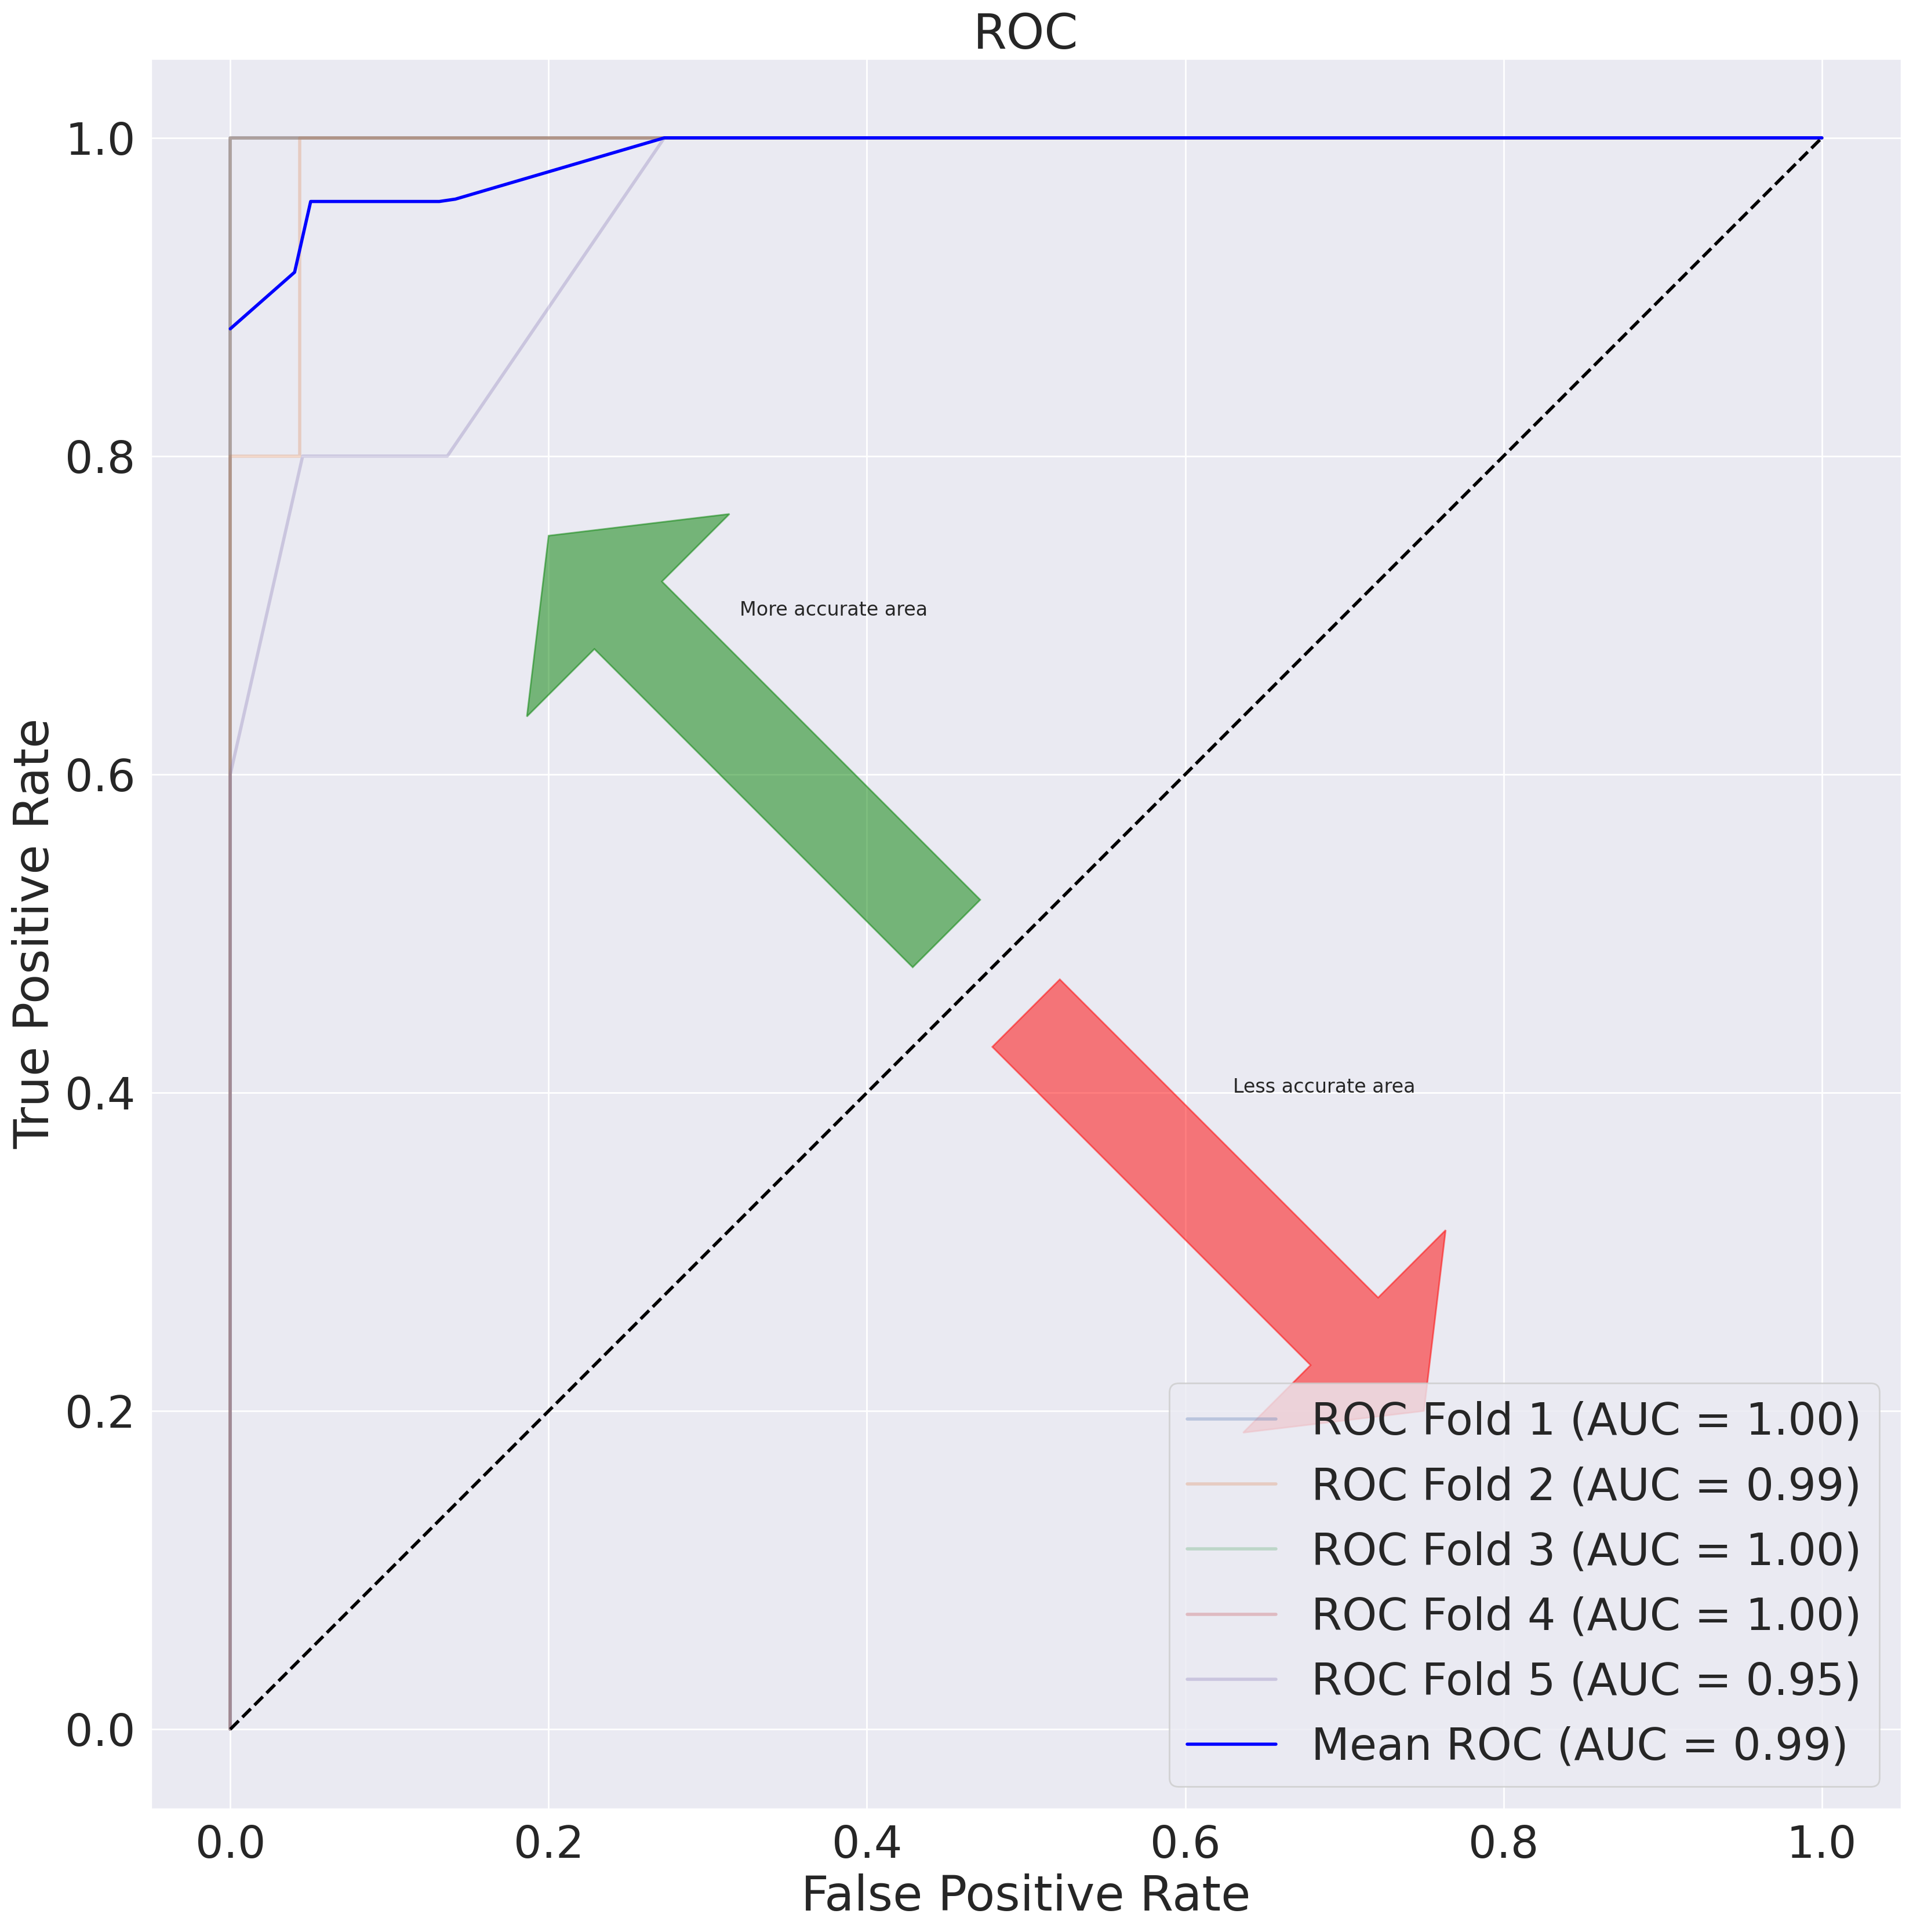

In [33]:
# ROC CURVE 

X = df1_num.loc[:, df1_num.columns != 'label']
y = df1_num.loc[:, 'label'].astype(int)

# one hot encoding is not applied.
model = xgb.XGBClassifier(random_state=42, 
                          n_jobs=-1,
                          use_label_encoder=True,
                          eval_metric='error',
                          colsample_bytree=0.5927,
                          gamma=0.40696,
                          learning_rate=0.1474,
                          max_depth=12,
                          reg_alpha=0.3320
                         )

kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True)

fig1 = plt.figure(figsize=[20, 20])
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Arrow(0.45, 0.5, -0.25, 0.25, width=0.3, color='green', alpha=0.5)
)
ax1.add_patch(
    patches.Arrow(0.5, 0.45, 0.25, -0.25, width=0.3, color='red', alpha=0.5)
)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
    
i = 1 

for train, test in kf.split(X, y): 
    pred = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], pred[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label="ROC Fold %d (AUC = %0.2f)" % (i, roc_auc))
    i += 1

plt.plot([0,1], [0,1], linestyle = '--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc), lw=2, alpha=1)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.text(0.32, 0.7, 'More accurate area', fontsize=12)
plt.text(0.63, 0.4, 'Less accurate area', fontsize=12)
plt.show()

## Thanks you for review my notebook.